<font color='purple' size=4><b>Importing Libraries</b></font>

In [1]:
import tensorflow as tf
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

<font color='purple' size=4><b>Loading Data</b></font>

In [2]:
df = pd.read_csv('C:\\Users\\sumit\\Desktop\\yoga_trainer\\classification_model\\CSVFiles\\TRAIN.CSV')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Image_name  1037 non-null   object 
 1   Shoulder_L  1037 non-null   float64
 2   Shoulder_R  1037 non-null   float64
 3   Elbow_L     1037 non-null   float64
 4   Elbow_R     1037 non-null   float64
 5   Waist_L     1037 non-null   float64
 6   Waist_R     1037 non-null   float64
 7   Knee_L      1037 non-null   float64
 8   Knee_R      1037 non-null   float64
 9   Pose_Num    1037 non-null   int64  
 10  Pose_Name   1037 non-null   object 
dtypes: float64(8), int64(1), object(2)
memory usage: 89.2+ KB


In [3]:
df.isnull().any()

Image_name    False
Shoulder_L    False
Shoulder_R    False
Elbow_L       False
Elbow_R       False
Waist_L       False
Waist_R       False
Knee_L        False
Knee_R        False
Pose_Num      False
Pose_Name     False
dtype: bool

In [4]:
x = df.iloc[:, 1:9]
y = df.iloc[:, 9]
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.15)

In [5]:
df_test = pd.read_csv('C:\\Users\\sumit\\Desktop\\yoga_trainer\\classification_model\\CSVFiles\\TEST.CSV')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465 entries, 0 to 464
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Image_name  465 non-null    object 
 1   Shoulder_L  465 non-null    float64
 2   Shoulder_R  465 non-null    float64
 3   Elbow_L     465 non-null    float64
 4   Elbow_R     465 non-null    float64
 5   Waist_L     465 non-null    float64
 6   Waist_R     465 non-null    float64
 7   Knee_L      465 non-null    float64
 8   Knee_R      465 non-null    float64
 9   Pose_Num    465 non-null    int64  
 10  Pose_Name   465 non-null    object 
dtypes: float64(8), int64(1), object(2)
memory usage: 40.1+ KB


In [6]:
df_test.isnull().any()

Image_name    False
Shoulder_L    False
Shoulder_R    False
Elbow_L       False
Elbow_R       False
Waist_L       False
Waist_R       False
Knee_L        False
Knee_R        False
Pose_Num      False
Pose_Name     False
dtype: bool

In [7]:
x_test = df_test.iloc[:, 1:9]
y_test = df_test.iloc[:, 9]

<font color='purple' size=4><b>Building Model</b></font>

In [8]:
model = tf.keras.Sequential([tf.keras.layers.Dense(128, activation=tf.nn.relu6),
                            tf.keras.layers.Dropout(0.3),
                            tf.keras.layers.Dense(64, activation=tf.nn.relu6),
                            tf.keras.layers.Dense(5, activation='linear')])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

<font color='purple' size=4><b>Training</b></font>

In [9]:
history = model.fit(x_train, y_train, epochs=200, batch_size=64, validation_data=(x_val, y_val))

Epoch 1/200
14/14 [==============================] - 1s 24ms/step - loss: 2.6538 - sparse_categorical_accuracy: 0.3190 - val_loss: 1.3321 - val_sparse_categorical_accuracy: 0.4808
Epoch 2/200
14/14 [==============================] - 0s 6ms/step - loss: 1.7816 - sparse_categorical_accuracy: 0.4381 - val_loss: 0.6610 - val_sparse_categorical_accuracy: 0.8013
Epoch 3/200
14/14 [==============================] - 0s 6ms/step - loss: 1.3463 - sparse_categorical_accuracy: 0.5369 - val_loss: 0.6149 - val_sparse_categorical_accuracy: 0.8269
Epoch 4/200
14/14 [==============================] - 0s 5ms/step - loss: 1.1675 - sparse_categorical_accuracy: 0.5902 - val_loss: 0.5878 - val_sparse_categorical_accuracy: 0.8141
Epoch 5/200
14/14 [==============================] - 0s 5ms/step - loss: 1.0453 - sparse_categorical_accuracy: 0.6334 - val_loss: 0.5543 - val_sparse_categorical_accuracy: 0.8077
Epoch 6/200
14/14 [==============================] - 0s 6ms/step - loss: 0.9457 - sparse_categorical_acc

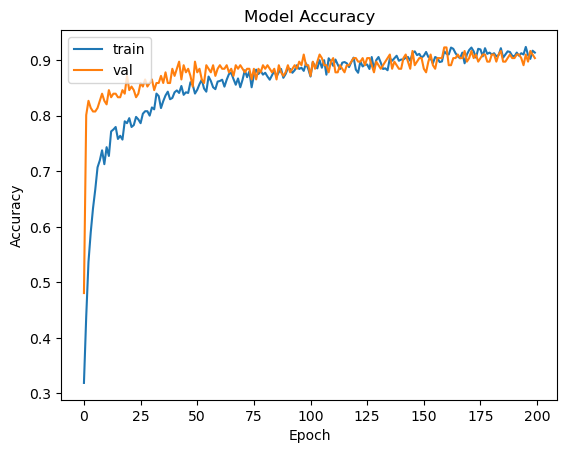

In [10]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

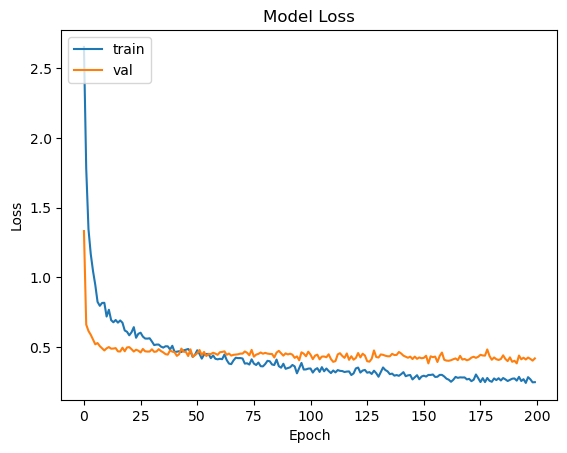

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

<font color='purple' size=4><b>Evaluating Model on Testing Data</b></font>

In [12]:
score = model.evaluate(x_test, y_test, verbose = 1)

15/15 [==============================] - 0s 2ms/step - loss: 0.1252 - sparse_categorical_accuracy: 0.9677


<font color='purple' size=4><b>Saving Model in JSON</b></font>

In [13]:
json_config = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(json_config)

In [14]:
model.save_weights('weights.h5')

<font color='purple' size=4><b>Saving Model Using Pickle</b></font>

In [15]:
import pickle

In [16]:
with open('model_pickle', 'wb') as f:
    pickle.dump(model, f)

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dropout
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\sparse_categorical_accuracy
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-03-09 02:52:36         2745
metadata.json                                  2023-03-09 02:52:36           64
variables.h5                                   2023-03-09 02:52:36       140656
